/tmp/ipython-input-141330529.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


MSE: 2.6619094267610834
R² Score: 0.9768570729445754


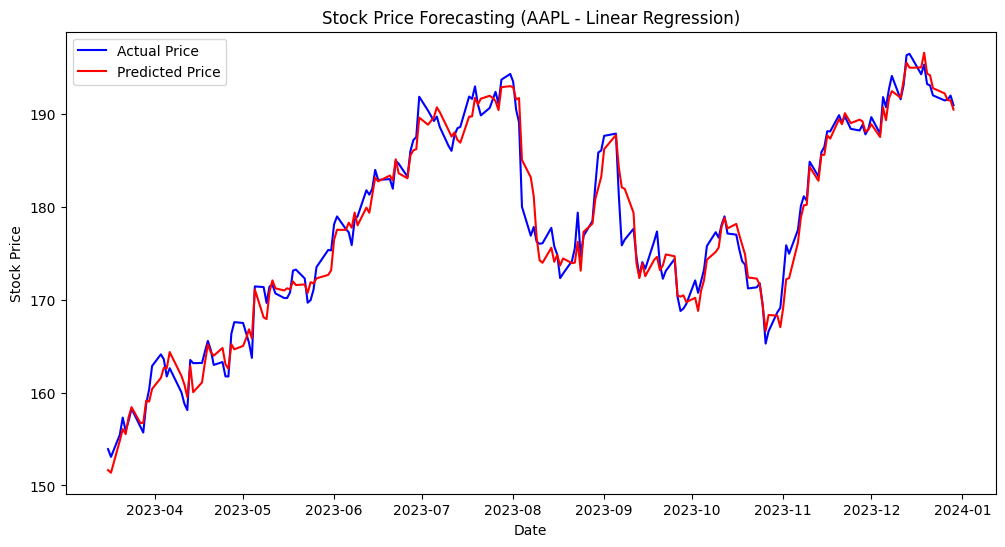

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------
# 1. Download stock data (Example: Apple - AAPL)
data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
df = data[["Close"]].copy()

# --------------------------
# 2. Feature Engineering
df["Return_1d"] = df["Close"].pct_change()
df["SMA_5"] = df["Close"].rolling(window=5).mean()
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df.dropna(inplace=True)

X = df[["Return_1d", "SMA_5", "SMA_10"]]
y = df["Close"]

# --------------------------
# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# --------------------------
# 4. Train ML model
model = LinearRegression()
model.fit(X_train, y_train)

# --------------------------
# 5. Prediction
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# --------------------------
# 6. Visualization
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], y_test, label="Actual Price", color="blue")
plt.plot(df.index[-len(y_test):], y_pred, label="Predicted Price", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecasting (AAPL - Linear Regression)")
plt.legend()
plt.show()
